In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")

In [4]:
X = dataset.iloc[:, 1:].to_numpy()
X = X.reshape(X.shape[0], 28, 28, 1)
y = dataset.iloc[:, 0].to_numpy()
y = tf.keras.utils.to_categorical(y)

In [5]:
X.shape, y.shape

((372450, 28, 28, 1), (372450, 26))

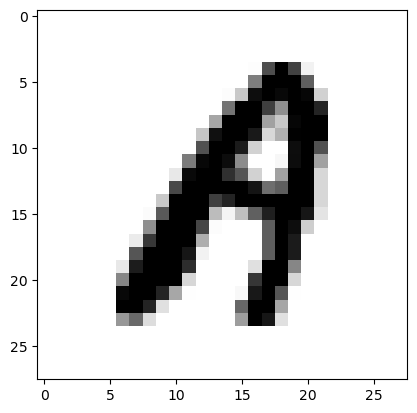

In [6]:
plt.imshow(X[0].reshape(28, 28),  cmap=plt.cm.binary)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), activation="relu", input_shape=(28, 28, 1)
    ),
    
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation="relu"),
    
    tf.keras.layers.Dense(128, activation="relu"),
    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(26, activation="softmax")
])

In [10]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
9312/9312 [==============================] - 43s 4ms/step - loss: 0.3903 - accuracy: 0.9052
Epoch 2/20
9312/9312 [==============================] - 35s 4ms/step - loss: 0.1480 - accuracy: 0.9623
Epoch 3/20
9312/9312 [==============================] - 37s 4ms/step - loss: 0.1265 - accuracy: 0.9684
Epoch 4/20
9312/9312 [==============================] - 36s 4ms/step - loss: 0.1146 - accuracy: 0.9716
Epoch 5/20
9312/9312 [==============================] - 35s 4ms/step - loss: 0.1086 - accuracy: 0.9736
Epoch 6/20
9312/9312 [==============================] - 35s 4ms/step - loss: 0.1053 - accuracy: 0.9749
Epoch 7/20
9312/9312 [==============================] - 36s 4ms/step - loss: 0.1000 - accuracy: 0.9758
Epoch 8/20
9312/9312 [==============================] - 35s 4ms/step - loss: 0.1005 - accuracy: 0.9763
Epoch 9/20
9312/9312 [==============================] - 35s 4ms/step - loss: 0.0968 - accuracy: 0.9775
Epoch 10/20
9312/9312 [==============================] - 35s 4ms/step - l

AttributeError: 'Sequential' object has no attribute 'evalute'

In [12]:
model.evaluate(X_test, y_test, verbose=2)

2328/2328 - 6s - loss: 0.2058 - accuracy: 0.9745 - 6s/epoch - 2ms/step


[0.20577804744243622, 0.9744932055473328]

In [17]:
model.predict(X[0].reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 92ms/step


array([[1.0000000e+00, 2.1403912e-33, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.2564533e-31,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 8.0122291e-11, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)